In [53]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt


In [111]:
filename = "D:\gli\dse\data\wisc_bc_data.csv"
data = read_csv(filename)

In [112]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [114]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [115]:
#diagnosis variable is a responsible variable for the classification
#replacing M and B with 1 and 0 respectively

data.diagnosis=data.diagnosis.map({'M':1,'B':0})

In [116]:
X = data.drop(labels= "diagnosis" , axis = 1)
Y = data.diagnosis

In [117]:
X_train, X_test , y_train , y_test = train_test_split(X,Y, test_size = 0.3)

## Simple KFold based on random selection of records

In [118]:
num_folds = 20
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression()
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.35       0.35       0.55       0.6        0.55       0.6
 0.6        0.55       0.65       0.55       0.9        0.7
 0.8        0.45       0.6        0.45       0.75       0.65
 0.57894737 0.73684211]
Accuracy: 59.829% (13.539%)


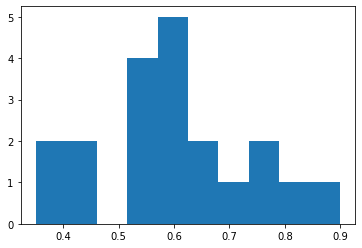

95.0 confidence interval 35.0% and 85.2%


In [119]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## When the classes are imbalanced, use StratifiedKFold to ensure the ratios are maintained in the K folds though the records are still randomly selected

In [120]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=num_folds, random_state= 1)

results = cross_val_score(model, X_train, y_train, cv=skf)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.35       0.35       0.65       0.65       0.65       0.65
 0.65       0.65       0.65       0.65       0.65       0.65
 0.6        0.4        0.6        0.6        0.6        0.6
 0.63157895 0.63157895]
Accuracy: 59.316% (9.774%)


d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## When classes are imbalanced, Overall Accuracy metric is not reliable. We should look at class level metric

In [121]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from statistics import mean, stdev

score_dict = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


In [122]:
num_folds = 50
seed = 7

skf = StratifiedKFold(n_splits=num_folds, random_state=seed)

model = LogisticRegression()
results = cross_validate(model, X_train, y_train, cv=skf , scoring=score_dict)




d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samp

d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

In [123]:

for key in results:
    print(key , mean(results[key]) , stdev(results[key]) )
    print(''.format(key, mean(results[key])*100.0, stdev(results[key])*100.0))



fit_time 0.004846000671386718 0.0017923043725231122

score_time 0.005068635940551758 0.0016067474604520857

test_accuracy 0.6135714285714285 0.07701885076781097

test_precision 0.02 0.08128433340529316

test_recall 0.06 0.2398979374820952

test_f1_score 0.029818181818181817 0.12042315900114538



### Recall distribution plot

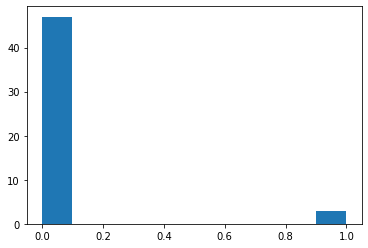

95.0 confidence interval for recall metric 0.0% and 100.0%


In [124]:
# plot scores
plt.hist(results['test_recall'])
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results['test_recall'], p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results['test_recall'], p))
print('%.1f confidence interval for recall metric %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

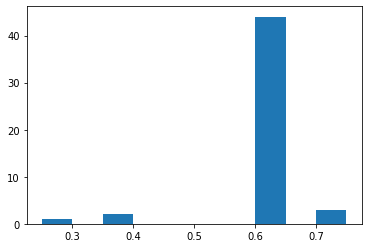

95.0 confidence interval for test_accuracy metric 37.5% and 71.4%


In [125]:
# plot scores
plt.hist(results['test_accuracy'])
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results['test_accuracy'], p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results['test_accuracy'], p))
print('%.1f confidence interval for test_accuracy metric %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))